# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
# Your code here
import pandas as pd

url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'

dataframe = pd.read_csv(url)

dataframe

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
dataframe.columns

Index(['Customer', 'ST', 'GENDER', 'Education', 'Customer Lifetime Value',
       'Income', 'Monthly Premium Auto', 'Number of Open Complaints',
       'Policy Type', 'Vehicle Class', 'Total Claim Amount'],
      dtype='object')

In [3]:
dataframe.columns = dataframe.columns.str.replace(' ', '_').str.lower()
dataframe.columns

Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount'],
      dtype='object')

In [4]:
dataframe = dataframe.rename(columns={'st':'state'})
dataframe.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [5]:
# Your code here

In [6]:
unique_names = dataframe['gender'].unique()
unique_names

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [7]:
#correcting the values M and F
import numpy as np

def clean(x):
    if x in ['M','Male']:
        return 'M'
    elif x in ['Femal', 'female', 'F']:
        return 'F'
    else:
        return np.nan
    

dataframe['gender'] = list(map(clean, dataframe['gender']))
dataframe

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataframe['gender'].value_counts()

gender
F    502
M    452
Name: count, dtype: int64

In [9]:
#state abbreviation correction
unique_names2 = dataframe['state'].unique()
unique_names2


array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [10]:
def clean(x):
    if x in ['WA','Washington']:
        return 'Washington'
    elif x in ['AZ', 'Arizona']:
        return 'Arizona'
    elif x in ['Nevada']:
        return 'Nevada'
    elif x in ['California', 'Cali']:
        return 'California'
    elif x in ['Oregon']:
        return 'Oregon'
    else:
        return np.nan
    

dataframe['state'] = list(map(clean, dataframe['state']))
dataframe

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dataframe['state'].value_counts()

state
California    331
Oregon        320
Arizona       211
Washington    111
Nevada         98
Name: count, dtype: int64

In [12]:
# replace Bachelor to Bachelor

unique_names3 = dataframe['education'].unique()
unique_names3


array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

In [13]:
#replace Bachelors with Bachelor
dataframe['education'] = dataframe['education'].replace({'Bachelors' : 'Bachelor'})

In [14]:
dataframe['education'].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [15]:
dataframe.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [16]:
#remove the % - same process as before

dataframe['customer_lifetime_value'] = dataframe['customer_lifetime_value'].str.replace('%', '')

display(dataframe)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"

dataframe['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Sports Car        57
Luxury SUV        20
Luxury Car        14
Name: count, dtype: int64

In [18]:
dataframe['vehicle_class'] = dataframe['vehicle_class'].replace({'Sport Cars' : 'Luxury'})
dataframe['vehicle_class'] = dataframe['vehicle_class'].replace({'Luxury SUV' : 'Luxury'})
dataframe['vehicle_class'] = dataframe['vehicle_class'].replace({'Luxury Car' : 'Luxury'})

dataframe['vehicle_class'].value_counts()

vehicle_class
Four-Door Car    576
Two-Door Car     205
SUV              199
Sports Car        57
Luxury            34
Name: count, dtype: int64

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [19]:
# Your code here

In [20]:
dataframe.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [21]:
#transform customer_lifetime_value into numeric

In [22]:
dataframe['customer_lifetime_value'].unique()

array([nan, '697953.59', '1288743.17', ..., '2031499.76', '323912.47',
       '899704.02'], dtype=object)

In [23]:
dataframe['customer_lifetime_value'] = dataframe['customer_lifetime_value'].astype(float)
print(dataframe['customer_lifetime_value'].dtype)

float64


In [24]:
dataframe['customer_lifetime_value'].unique()

array([       nan,  697953.59, 1288743.17, ..., 2031499.76,  323912.47,
        899704.02])

In [25]:
#Number of open complaints has an incorrect format
dataframe['number_of_open_complaints'].unique()

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [26]:
dataframe.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [27]:
#split
dataframe['number_of_open_complaints'] = dataframe['number_of_open_complaints'].astype(str)
dataframe['number_of_open_complaints'] = dataframe['number_of_open_complaints'].str.split('/').str[1]


In [28]:
dataframe['number_of_open_complaints'].unique()

array(['0', '2', '1', '3', '5', '4', nan], dtype=object)

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [29]:
# identifying duplicates
display(dataframe.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
4003     True
4004     True
4005     True
4006     True
4007     True
Length: 4008, dtype: bool

In [30]:
# my strategy = Keeping only the first occurrence of each duplicated row - drop_duplicates function
dataframe.drop_duplicates(keep='first', inplace=True)
dataframe.reset_index(drop=True, inplace=True)

print(dataframe.duplicated()) # to check if duplicates have been deleted

0       False
1       False
2       False
3       False
4       False
        ...  
1067    False
1068    False
1069    False
1070    False
1071    False
Length: 1072, dtype: bool


In [31]:
#
output_file = 'cleaned_dataset.csv'

dataframe.to_csv(output_file, index=False)

print(f"Cleaned dataset saved to {output_file}")

Cleaned dataset saved to cleaned_dataset.csv


## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers using `applymap()`.

In [32]:
import pandas as pd

In [33]:
dataframe = pd.read_csv('cleaned_dataset.csv')
dataframe.head()

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323


In [ ]:
# identify columns with null or missing values

In [40]:
# null values in each column
null_columns = dataframe.columns[dataframe.isnull().any()]

# columns with null values
display(null_data)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,2.0,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,0.0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487.0,114.0,0.0,Special Auto,SUV,547.200000
1070,MY31220,California,F,College,899704.02,54230.0,112.0,0.0,Personal Auto,Two-Door Car,537.600000


In [42]:
# strategy Fill the null values with the previous or next value in the column

# Fill null values with the previous value in each column
dataframe.fillna(method='ffill', inplace=True)  

# Display the DataFrame with null values filled
display("DataFrame with Null Values Filled:")
display(dataframe)

'DataFrame with Null Values Filled:'

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,697953.59,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,2031499.76,63209.0,102.0,2.0,Personal Auto,SUV,207.320041
1068,GS98873,Arizona,F,Bachelor,323912.47,16061.0,88.0,0.0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11,79487.0,114.0,0.0,Special Auto,SUV,547.200000
1070,MY31220,California,F,College,899704.02,54230.0,112.0,0.0,Personal Auto,Two-Door Car,537.600000


In [ ]:
## https://www.geeksforgeeks.org/python-pandas-series-isnull/

In [46]:
#verify if it worked

if dataframe.isnull().any().any():
    print("Columns with Null Values after Filling:")
    print(dataframe.columns[dataframe.isnull().any()])
else:
    print("No more null values in the DataFrame after filling.")

No more null values in the DataFrame after filling.


In [52]:
# convert the numeric values to interger

dataframe = dataframe.applymap(lambda x: int(x) if str(x).replace('.', '', 1).isdigit() else x)

#if x is int then leave x
#if x is a str then replace . with ''
# if x is something else then leave x

# Display the updated DataFrame with numeric variables as integers
display(dataframe)

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,F,Master,697953,0,1000,0,Personal Auto,Four-Door Car,2
1,QZ44356,Arizona,F,Bachelor,697953,0,94,0,Personal Auto,Four-Door Car,1131
2,AI49188,Nevada,F,Bachelor,1288743,48767,108,0,Personal Auto,Two-Door Car,566
3,WW63253,California,M,Bachelor,764586,0,106,0,Corporate Auto,SUV,529
4,GA49547,Washington,M,High School or Below,536307,36357,68,0,Personal Auto,Four-Door Car,17
...,...,...,...,...,...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,2031499,63209,102,2,Personal Auto,SUV,207
1068,GS98873,Arizona,F,Bachelor,323912,16061,88,0,Personal Auto,Four-Door Car,633
1069,CW49887,California,F,Master,462680,79487,114,0,Special Auto,SUV,547
1070,MY31220,California,F,College,899704,54230,112,0,Personal Auto,Two-Door Car,537


# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [ ]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [55]:
# Lab | Customer Analysis Round 4

import pandas as pd
import numpy as np

dataframe = pd.read_csv('cleaned_dataset.csv')

# check the data types of the columns
data_types = dataframe.dtypes
data_types

customer                      object
state                         object
gender                        object
education                     object
customer_lifetime_value      float64
income                       float64
monthly_premium_auto         float64
number_of_open_complaints    float64
policy_type                   object
vehicle_class                 object
total_claim_amount           float64
dtype: object

In [60]:
# Select the numeric columns and categorical columns
numerical = dataframe.select_dtypes(include=[np.number])

categorical = dataframe.select_dtypes(include=[object])

display("\nNumeric Columns:")
display(numerical)
display("\cCategorical Columns:")
display(categorical)

'\nNumeric Columns:'

,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,total_claim_amount
0,NaN,0.0,1000.0,0.0,2.704934
1,697953.59,0.0,94.0,0.0,1131.464935
2,1288743.17,48767.0,108.0,0.0,566.472247
3,764586.18,0.0,106.0,0.0,529.881344
4,536307.65,36357.0,68.0,0.0,17.269323
...,...,...,...,...,...
1067,2031499.76,63209.0,102.0,2.0,207.320041
1068,323912.47,16061.0,88.0,0.0,633.600000
1069,462680.11,79487.0,114.0,0.0,547.200000
1070,899704.02,54230.0,112.0,0.0,537.600000


'\\cCategorical Columns:'

,customer,state,gender,education,policy_type,vehicle_class
0,RB50392,Washington,NaN,Master,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,Special Auto,SUV
1070,MY31220,California,F,College,Personal Auto,Two-Door Car


In [61]:
# importing seaborn and matplot for istograms
import seaborn as sns
import matplotlib.pyplot as plt

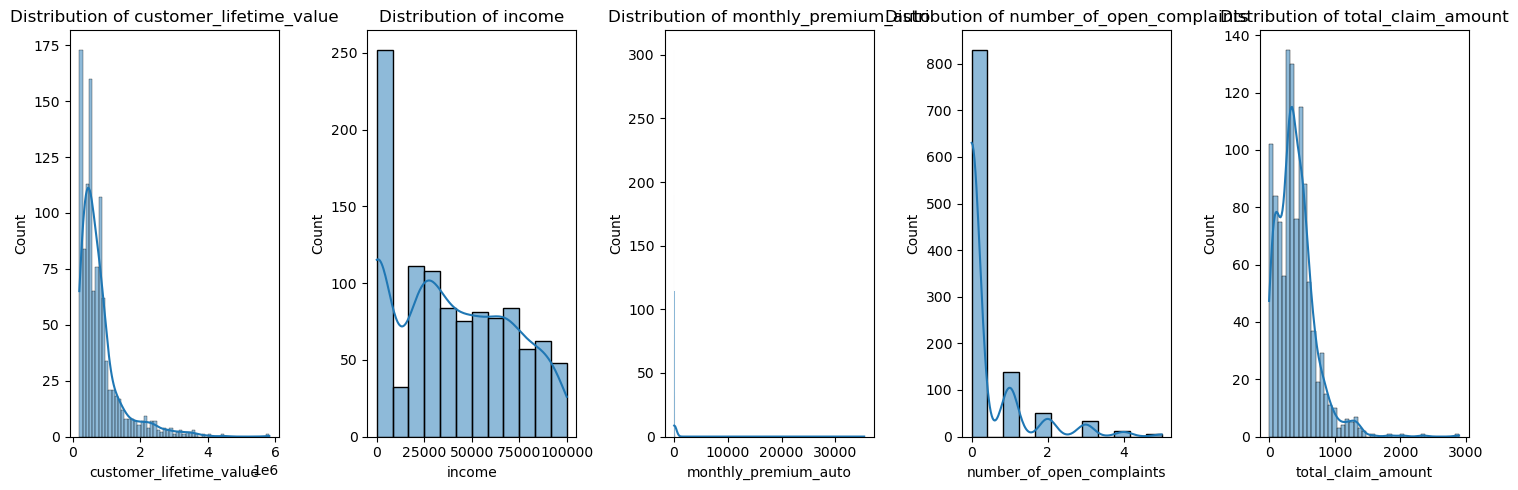

In [66]:
fig, axes = plt.subplots(1, len(numerical.columns), figsize=(15, 5))

# Create distribution plots 
for i, column in enumerate(numerical.columns):
    sns.histplot(data=numerical, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

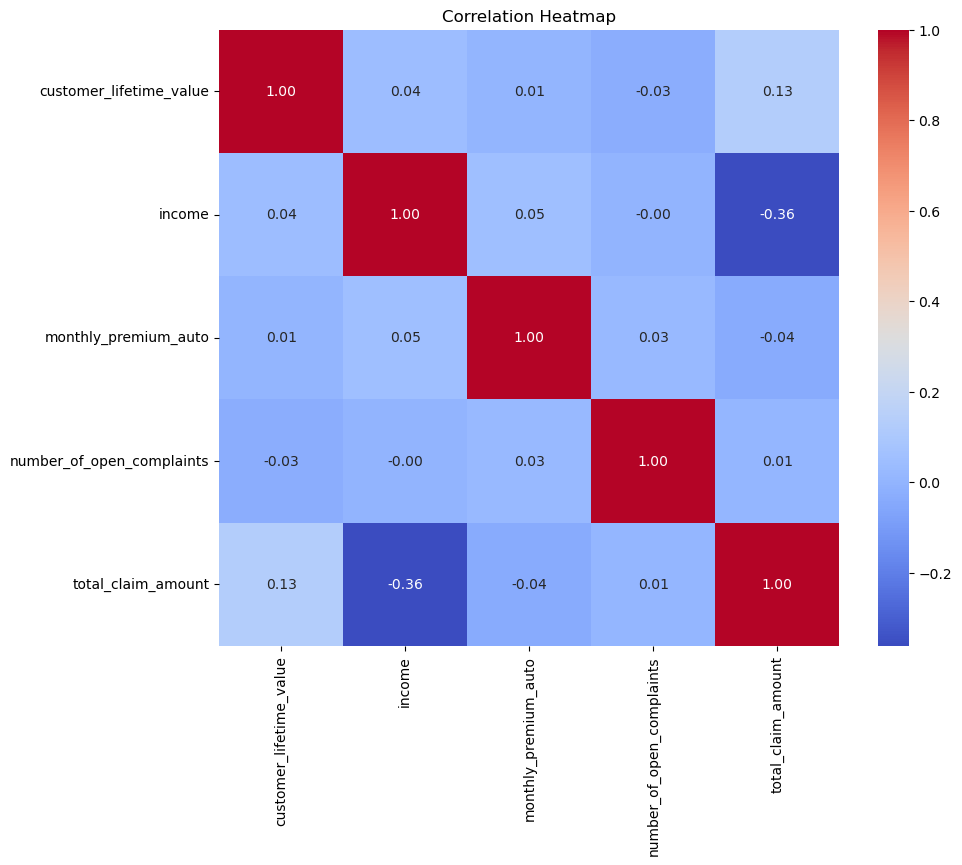

In [68]:
# correlation matrix

correlation_matrix = numerical.corr()

# visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [69]:
# how to find pairs with high correlated features (corr > 9)
highly_correlated = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            highly_correlated.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

In [70]:
#drop one of the features in each pair

for feature1, feature2 in highly_correlated:
    
    # Drop feature2 from the DataFrame
    dataframe.drop(columns=feature2, inplace=True)


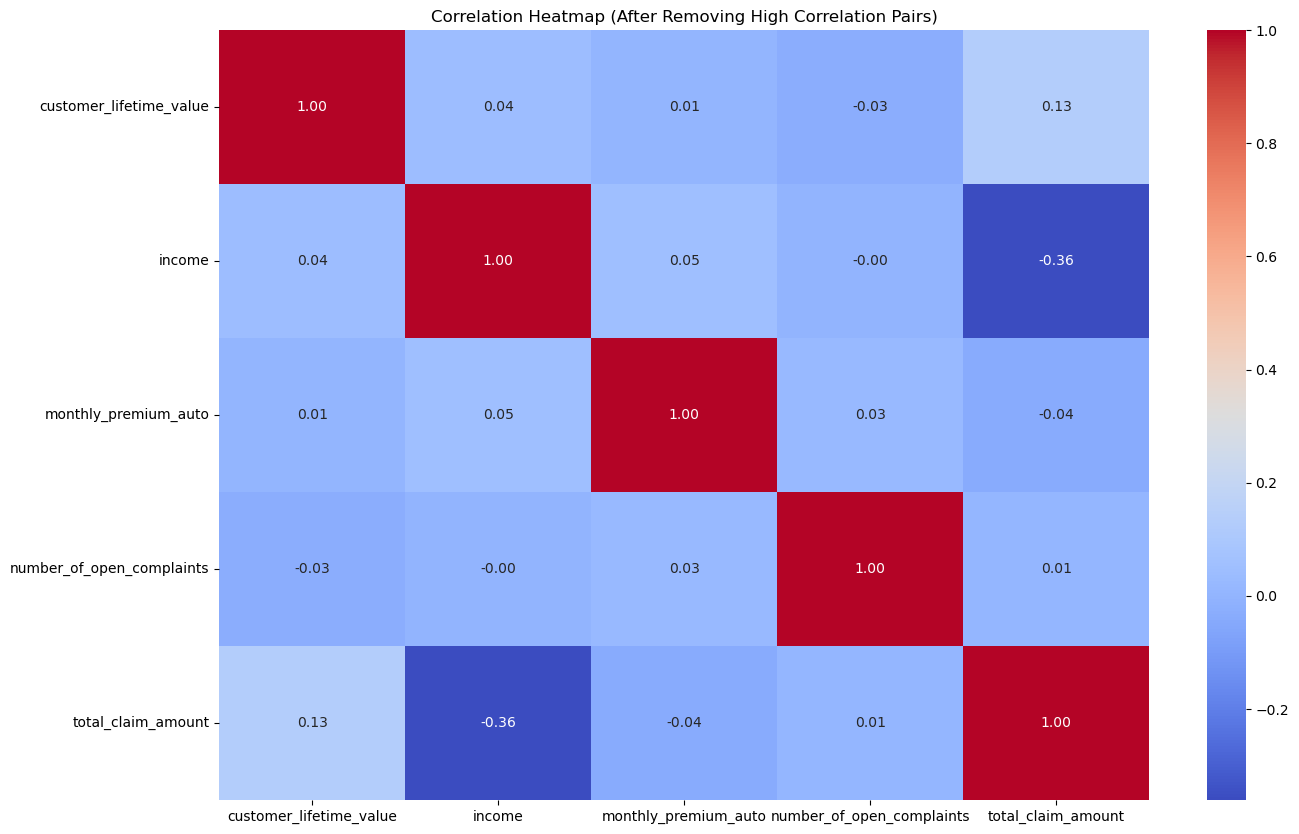

In [76]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (After Removing High Correlation Pairs)')

# Display the heatmap
plt.show()

#if there was no high correlation betweean a pair of features, no correlation will be dropped

In [ ]:
#suggests that there is no strong linear relationship or multicollinearity between the features in the dataset.

#features are relatively independent.

In [83]:
# X, Y SPLIT || Lab | Customer Analysis Round 5

X = dataframe.drop(columns=['total_claim_amount'])  
y = dataframe['total_claim_amount']  
X
y

0          2.704934
1       1131.464935
2        566.472247
3        529.881344
4         17.269323
           ...     
1067     207.320041
1068     633.600000
1069     547.200000
1070     537.600000
1071            NaN
Name: total_claim_amount, Length: 1072, dtype: float64

In [84]:
#scaling (numerical)

from sklearn.preprocessing import StandardScaler

In [85]:

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)
X_num
X_cat

,customer,state,gender,education,policy_type,vehicle_class
0,RB50392,Washington,NaN,Master,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...,...
1067,VJ51327,California,F,High School or Below,Personal Auto,SUV
1068,GS98873,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1069,CW49887,California,F,Master,Special Auto,SUV
1070,MY31220,California,F,College,Personal Auto,Two-Door Car


In [ ]:
# 

# Lab | Customer Analysis Round 3 (EDA-Using Graphs)

#Show DataFrame info.
dataframe.info()


In [ ]:
#Describe DataFrame
dataframe.describe()


In [ ]:
#Gender breakdown

import matplotlib.pyplot as plt

gender_counts = dataframe['gender'].value_counts()
gender_counts.plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('count')
plt.title('gender Breakdown')
plt.show()


In [ ]:
#plot of Income by State.

income_by_state = dataframe.groupby('state')['income'].mean()
income_by_state.plot(kind='bar')
plt.xlabel('state')
plt.ylabel('average income')
plt.title('income by state')
plt.show()

In [ ]:
#Show a plot of the Policy Type by the Total Claim Amount.

import matplotlib.pyplot as plt

policy_type_claim = dataframe.groupby('policy_type')['total_claim_amount'].mean()
policy_type_claim.plot(kind='bar')
plt.xlabel('policy_type')
plt.ylabel('average total claim amount')
plt.title('policy type by total claim amount')
plt.show()


In [ ]:
#Show a plot of the Education by Vehicle Class.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue ='vehicle_class', data=dataframe)
plt.xlabel('education')
plt.ylabel('count')
plt.title('education by vehicle class')
plt.xticks(rotation=45)
plt.show()
